In [1]:
import numpy as np

def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

number_of_uavs = 20  # Update this based on your actual number of UAVs
total_distances = np.zeros(number_of_uavs)  # An array to store total distances for each UAV
prev_positions = [None] * number_of_uavs * 2  # To store previous x and y positions for each UAV

with open('out_ripna.csv', 'r') as file:
    next(file)  # Skip the header
    for line in file:
        positions = line.strip().split(',')
        for uav_id in range(number_of_uavs):
            x_index = uav_id * 2
            y_index = uav_id * 2 + 1
            x = float(positions[x_index])
            y = float(positions[y_index])

            # If it's not the first position, calculate the distance from the previous position
            if prev_positions[x_index] is not None and prev_positions[y_index] is not None:
                distance = calculate_distance(prev_positions[x_index], prev_positions[y_index], x, y)
                total_distances[uav_id] += distance

            # Update the previous positions
            prev_positions[x_index], prev_positions[y_index] = x, y

# Print the total distances for each UAV
for uav_id in range(number_of_uavs):
    print(f"{total_distances[uav_id]}")


597.1674039868111
95.20536750636207
276.86535059584276
95.9095396987892
601.7424739846163
96.26749897682778
259.72088298294136
425.62579568709765
442.7848636263253
95.91119681634954
275.16391343658955
431.2208735672159
437.1675131112998
610.1043682257927
551.6397579336597
476.0237584190725
443.13025249174547
543.2276305761941
275.8268644645242
486.8674429799581


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np
from hyperparameters import radius, n

In [3]:
n

24

In [4]:
# Replace 'your_position_file.csv' with the actual file name
file_name = 'out_ripna.csv'

# Read the position data
df = pd.read_csv(file_name)


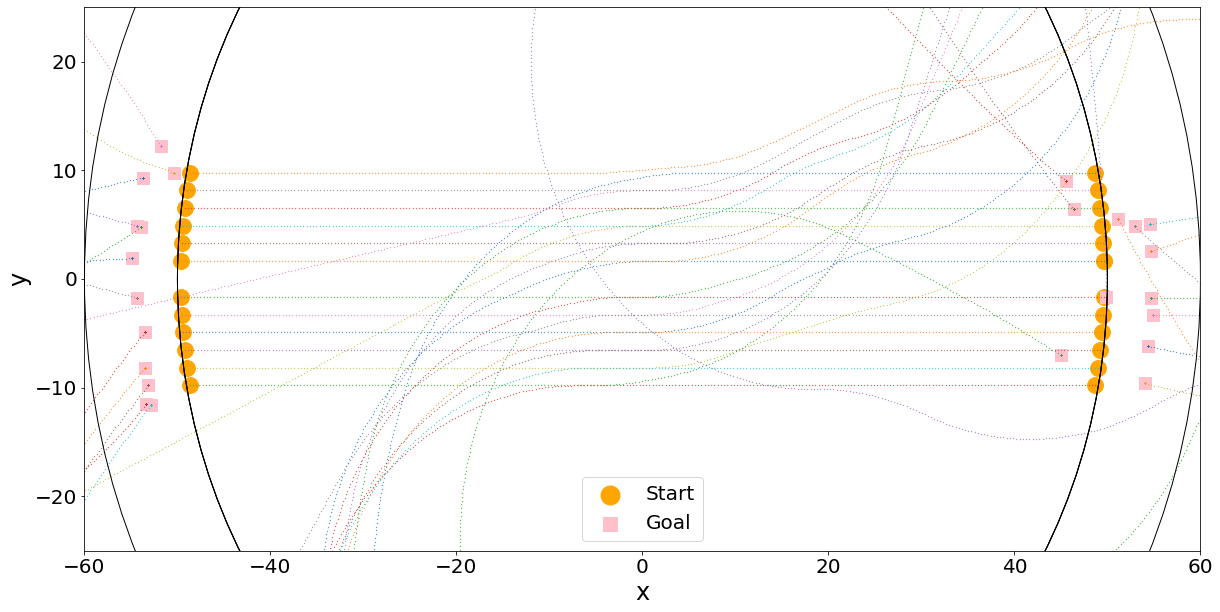

In [5]:
fig,axes = plt.subplots(figsize=(20,10))
axes.set_xlim([-radius,radius])
axes.set_ylim([-radius,radius])
starts = []
for i in range(n):
    axes.scatter(df[str(i)+'x'].iloc[0],df[str(i)+'y'].iloc[0], marker="o", color='orange', s=250)
    axes.scatter(df[str(i)+'x'].iloc[-1],df[str(i)+'y'].iloc[-1], marker="s", color='pink', s=125)

axes.scatter(df[str(0)+'x'].iloc[0],df[str(0)+'y'].iloc[0], marker="o", color='orange', s=250, label='Start')
axes.scatter(df[str(0)+'x'].iloc[-1],df[str(0)+'y'].iloc[-1], marker="s", color='pink', s=125, label='Goal')

axes.legend(markerscale=1.2, fontsize=20)

for i in range(n):
    #c = priority[i]
    plt.scatter(df[str(i)+'x'],df[str(i)+'y'],s=0.1)
#plt.legend(priority, markerscale=20)

c2 = plt.Circle((0,0), radius, fill=False)
c1 = plt.Circle((0,0), radius, fill=False)
plt.gca().add_artist(c2)
plt.gca().add_artist(c1)

plt.xlim(-1.2*radius, 1.2*radius)
plt.ylim(-radius/2,radius/2)
#plt.ylim(-20,20)

plt.gca().add_patch(plt.Circle((0,0), radius, fill=False))
plt.gca().add_patch(plt.Circle((0,0), 1.2*radius, fill=False))
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)




#plt.show()
#plt.savefig('/media/storage/Agam/pca/plots/comparison plots/8_paths_spread_piby8.eps', format='eps')

plt.show()